In [1]:
%matplotlib inline

http://alleninstitute.github.io/AllenSDK/_static/examples/nb/mouse_connectivity.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi
import nibabel as nb
from nighres.io import io_mesh

In [3]:
# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='/home/julia/data/gradients/atlas/allen_api/mouse_connectivity_manifest.json')

In [4]:
# Get the template ant the annotation volume
template, template_info = mcc.get_template_volume('/home/julia/data/gradients/atlas/allen_api/template.nrrd')
annot, annot_info = mcc.get_annotation_volume('/home/julia/data/gradients/atlas/allen_api/annotation.nrrd')

In [45]:
# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()
# structure_tree.get_name_map()

# get info on some structures
structures = structure_tree.get_structures_by_name(['Isocortex', 'root'])
pd.DataFrame(structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,Isocortex,1,5,315,Isocortex,"[997, 8, 567, 688, 695, 315]","[2, 112905828, 691663206, 12, 184527634, 11290...","[112, 255, 113]"
1,root,1,0,997,root,[997],[691663206],"[255, 255, 255]"


structure_tree.get_structures_by_name(['Cerebral cortex'])

cc_mask, cc_info = mcc.get_structure_mask(688, '/home/julia/data/gradients/atlas/allen_api/cerebral_cortex.nrrd')
nb.Nifti1Image(cc_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/cerebral_cortex.nii.gz')

In [56]:
iso_structs = structure_tree.descendants([315])[0]

In [105]:
l1 = []
l2_3 = []
l4 = []
l5 = []
l6a = []
l6b = []
lx = []

for i in range(len(iso_structs)):
    if 'layer 1' in iso_structs[i]['name'].lower():
        l1.append(iso_structs[i])
    elif 'layer 2/3' in iso_structs[i]['name'].lower():
        l2_3.append(iso_structs[i])
    elif 'layer 2' in iso_structs[i]['name'].lower():
        l2_3.append(iso_structs[i])
    elif 'layer 4' in iso_structs[i]['name'].lower():
        l4.append(iso_structs[i])
    elif 'layer 5' in iso_structs[i]['name'].lower():
        l5.append(iso_structs[i])
    elif 'layer 6a' in iso_structs[i]['name'].lower():
        l6a.append(iso_structs[i])
    elif 'layer 6b' in iso_structs[i]['name'].lower():
        l6b.append(iso_structs[i])
    else:
        lx.append(iso_structs[i])            

In [110]:
l1_mask = np.zeros_like(template)
for m in l1:
    try:
        l1_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l1_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l1.nii.gz')

2019-08-15 16:42:05,730 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_107.nrrd
2019-08-15 16:42:06,248 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_107.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_107.nrrd (request).
2019-08-15 16:42:06,250 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:42:06,256 allensdk.api.api.retrieve_file_over_htt

2019-08-15 16:42:27,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_959.nrrd
2019-08-15 16:42:28,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_801.nrrd
2019-08-15 16:42:29,225 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_801.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_801.nrrd (request).
2019-08-15 16:42:29,228 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for struc

2019-08-15 16:42:57,635 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:42:57,638 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149290.nrrd
2019-08-15 16:42:58,053 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_480149290.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149290.nrrd (request).
2019-08-15 16:42:58,056 allensdk.api.api.retr

In [112]:
l2_3_mask = np.zeros_like(template)
for m in l2_3:
    try:
        l2_3_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l2_3_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l2_3.nii.gz')

2019-08-15 16:45:25,437 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_667.nrrd
2019-08-15 16:45:26,945 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_219.nrrd
2019-08-15 16:45:27,773 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_219.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_219.nrrd (request).
2019-08-15 16:45:27,774 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for struc

2019-08-15 16:45:57,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_643.nrrd
2019-08-15 16:45:58,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_755.nrrd
2019-08-15 16:46:00,630 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_561.nrrd
2019-08-15 16:46:01,521 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_561.nrrd from http://download.alleninstitute.org/informatics-a

2019-08-15 16:46:31,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_524.nrrd
2019-08-15 16:46:31,695 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_524.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_524.nrrd (request).
2019-08-15 16:46:31,698 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:46:31,701 allensdk.api.api.retrieve_file_over_htt

2019-08-15 16:46:53,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_888.nrrd
2019-08-15 16:46:55,342 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_427.nrrd


In [116]:
l4_mask = np.zeros_like(template)
for m in l4:
    try:
        l4_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l4_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l4.nii.gz')

2019-08-15 16:52:39,655 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_12995.nrrd
2019-08-15 16:52:40,131 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_12995.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_12995.nrrd (request).
2019-08-15 16:52:40,134 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:52:40,138 allensdk.api.api.retrieve_file_ov

2019-08-15 16:53:01,353 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_401.nrrd
2019-08-15 16:53:02,736 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_573.nrrd
2019-08-15 16:53:03,922 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_721.nrrd
2019-08-15 16:53:05,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_869.nrrd
2019-08-15 16:53

In [113]:
l5_mask = np.zeros_like(template)
for m in l5:
    try:
        l5_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l5_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l5.nii.gz')

2019-08-15 16:47:53,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_526157192.nrrd
2019-08-15 16:47:55,133 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_299.nrrd
2019-08-15 16:47:55,529 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_299.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_299.nrrd (request).
2019-08-15 16:47:55,531 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for

2019-08-15 16:48:22,899 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_791.nrrd
2019-08-15 16:48:24,105 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_1023.nrrd
2019-08-15 16:48:25,295 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_937.nrrd
2019-08-15 16:48:25,819 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_937.nrrd from http://download.alleninstitute.org/informatics-

2019-08-15 16:48:57,715 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_480149274.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149274.nrrd (request).
2019-08-15 16:48:57,716 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:48:57,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149302.nrrd
2019-08-15 16:48:58,133 allensdk.api.api.retr

In [114]:
l6a_mask = np.zeros_like(template)
for m in l6a:
    try:
        l6a_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l6a_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l6a.nii.gz')

2019-08-15 16:49:13,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_526157196.nrrd
2019-08-15 16:49:15,219 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_644.nrrd
2019-08-15 16:49:16,105 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_644.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_644.nrrd (request).
2019-08-15 16:49:16,108 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for

2019-08-15 16:49:37,511 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_249.nrrd
2019-08-15 16:49:38,762 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_520.nrrd
2019-08-15 16:49:40,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_457.nrrd
2019-08-15 16:49:40,482 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_457.nrrd from http://download.alleninstitute.org/informatics-a

2019-08-15 16:50:05,332 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:50:05,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149306.nrrd
2019-08-15 16:50:05,757 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_480149306.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149306.nrrd (request).
2019-08-15 16:50:05,759 allensdk.api.api.retr

In [115]:
l6b_mask = np.zeros_like(template)
for m in l6b:
    try:
        l6b_mask += mcc.get_structure_mask(m['id'])[0]
    except:
        pass
nb.Nifti1Image(l6b_mask, np.eye(4)).to_filename('/home/julia/data/gradients/atlas/allen_api/l6b.nii.gz')

2019-08-15 16:50:15,847 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_526322264.nrrd
2019-08-15 16:50:17,097 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_947.nrrd
2019-08-15 16:50:17,560 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_947.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_947.nrrd (request).
2019-08-15 16:50:17,563 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for

2019-08-15 16:50:36,694 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_456.nrrd
2019-08-15 16:50:37,880 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_598.nrrd
2019-08-15 16:50:39,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_497.nrrd
2019-08-15 16:50:39,598 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_497.nrrd from http://download.alleninstitute.org/informatics-a

2019-08-15 16:51:03,728 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks
2019-08-15 16:51:03,733 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149310.nrrd
2019-08-15 16:51:04,144 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/julia/data/gradients/atlas/allen_api/annotation/ccf_2017/structure_masks/resolution_25/structure_480149310.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_480149310.nrrd (request).
2019-08-15 16:51:04,146 allensdk.api.api.retr

In [8]:
# get binary masks and info for the isocortex and whole brain
cortex_mask, cm_info = mcc.get_structure_mask(315, '/home/julia/data/gradients/atlas/allen_api/cortex.nrrd')
root_mask, root_info = mcc.get_structure_mask(997, '/home/julia/data/gradients/atlas/allen_api/brain.nrrd')

2019-08-05 14:00:29,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_315.nrrd
2019-08-05 14:00:33,331 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_997.nrrd


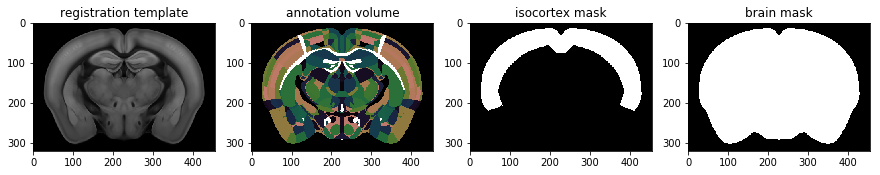

In [10]:
slice_idx = 264

f, ccf_axes = plt.subplots(1, 4, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='cubehelix', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("annotation volume")

ccf_axes[2].imshow(cortex_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[2].set_title("isocortex mask")

ccf_axes[3].imshow(root_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[3].set_title("brain mask")

plt.show()

In [20]:
# save volumes as nii
nb.Nifti1Image(cortex_mask, np.eye(4)).to_filename('/home/julia/projects/gradients/atlas/allen_api/cortex.nii.gz')
nb.Nifti1Image(root_mask, np.eye(4)).to_filename('/home/julia/projects/gradients/atlas/allen_api/brain.nii.gz')
nb.Nifti1Image(annot, np.eye(4)).to_filename('/home/julia/projects/gradients/atlas/allen_api/annotation.nii.gz')
nb.Nifti1Image(template, np.eye(4)).to_filename('/home/julia/projects/gradients/atlas/allen_api/template.nii.gz')

In [13]:
# access meshes of whole brain and cortex
cortex_mesh=mcc.get_structure_mesh(315, '/home/julia/projects/gradients/atlas/allen_api/cortex_mesh.obj')
root_mesh=mcc.get_structure_mesh(997, '/home/julia/projects/gradients/atlas/allen_api/brain_mesh.obj')

In [25]:
# write to vtk
io_mesh.save_mesh_geometry('/home/julia/projects/gradients/atlas/allen_api/cortex_mesh.vtk',
                           {"points":cortex_mesh[0], "faces":cortex_mesh[2]})
io_mesh.save_mesh_geometry('/home/julia/projects/gradients/atlas/allen_api/brain_mesh.vtk',
                           {"points":root_mesh[0], "faces":root_mesh[2]})


Saving /home/julia/projects/gradients/atlas/allen_api/cortex_mesh.vtk

Saving /home/julia/projects/gradients/atlas/allen_api/brain_mesh.vtk


In [43]:
# Map Jo's template to this one
img = nb.load("/home/julia/projects/gradients/atlas/ABI_template_25um.nii")
data = img.get_data()

In [30]:
print("Allen", template.shape)
print("Jo", data.shape)

Allen (528, 320, 456)
Jo (456, 528, 320)


In [32]:
# Swap and flip data (figured out in other notebook)
data_swap = np.swapaxes(np.swapaxes(data, 0,1), 1,2)
data_flip = np.flip(np.flip(data_swap,0),1)

In [33]:
print("Allen", template.shape)
print("Jo fixed", data_flip.shape)

Allen (528, 320, 456)
Jo swapped (528, 320, 456)


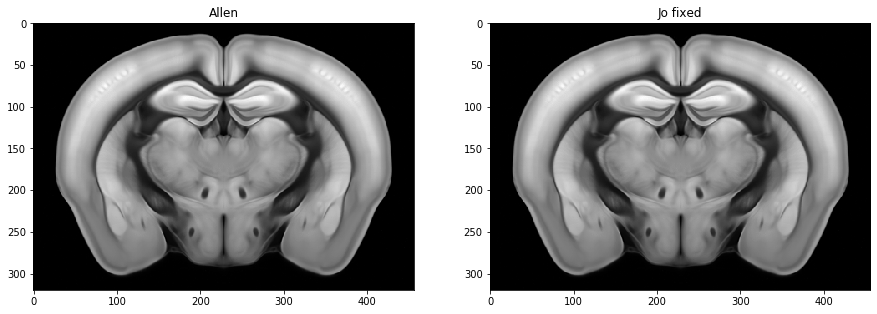

In [40]:
slice_idx = 264

f, ccf_axes = plt.subplots(1, 2, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal')
ccf_axes[0].set_title("Allen")

ccf_axes[1].imshow(data_flip[slice_idx,:,:], cmap='gray', aspect='equal')
ccf_axes[1].set_title("Jo fixed")

plt.show()

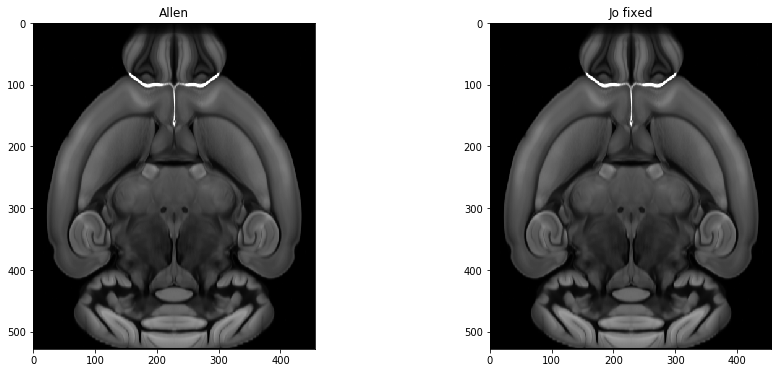

In [41]:
slice_idx = 160

f, ccf_axes = plt.subplots(1, 2, figsize=(15, 6))

ccf_axes[0].imshow(template[:,slice_idx,:], cmap='gray', aspect='equal')
ccf_axes[0].set_title("Allen")

ccf_axes[1].imshow(data_flip[:,slice_idx,:], cmap='gray', aspect='equal')
ccf_axes[1].set_title("Jo fixed")

plt.show()

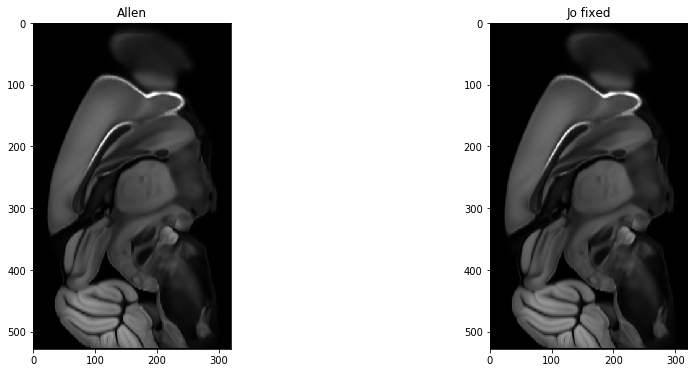

In [42]:
slice_idx = 225

f, ccf_axes = plt.subplots(1, 2, figsize=(15, 6))

ccf_axes[0].imshow(template[:,:,slice_idx], cmap='gray', aspect='equal')
ccf_axes[0].set_title("Allen")

ccf_axes[1].imshow(data_flip[:,:,slice_idx], cmap='gray', aspect='equal')
ccf_axes[1].set_title("Jo fixed")

plt.show()

In [46]:
# load some of the cell positions
positions = pd.read_csv('/home/julia/data/gradients/atlas/register_AMBA/positions.txt', 
                        chunksize=10000,
                        #iterator=True,
                        #nrows=10000000, 
                        usecols=[0,1,2,3,4], 
                        header=None, 
                        skiprows=1,
                        names=['x', 'y', 'z', 'region', 'type'])

In [47]:
drn_df = pd.DataFrame()
for chunk in positions:
    drn_df = drn_df.append(chunk.loc[chunk['region'] == 872])

In [48]:
drn_df

,x,y,z,region,type
52089687,3303.89,387.37600,-8.16917,872,inh
52090314,2950.48,320.78200,-186.06800,872,mod
52090772,3108.59,345.29400,99.17180,872,mod
52091233,3161.58,382.87500,-7.51457,872,mod
52091292,3281.57,237.31500,-34.02370,872,inh
52091837,2968.07,564.96700,-114.30900,872,mod
52094731,3043.82,223.34100,-70.31820,872,exc
52094858,3393.74,272.59900,35.03190,872,mod
52096927,3351.38,446.31800,-81.17410,872,mod
52097958,3211.98,450.96200,-136.03400,872,mod


In [39]:
chunk.loc[chunk['region'] == 872]

,x,y,z,region,type
111071423,2628.96,403.1230,33.3633,872,micGl
111075107,3460.87,417.6240,94.7994,872,oligo
111076574,2996.77,227.1140,-118.4970,872,oligo
111077494,3639.08,258.5010,-26.1944,872,astro
111077901,3063.10,243.6820,72.9313,872,oligo
111078776,3176.75,397.3940,48.4638,872,micGl
111078830,3268.24,-77.1622,-143.4470,872,astro
111079725,2923.56,248.6400,32.9693,872,astro


In [16]:
# get info on some structures
structures = structure_tree.get_structures_by_name(['Dorsal nucleus raphe'])
pd.DataFrame(structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,DR,1,881,872,Dorsal nucleus raphe,"[997, 8, 343, 313, 348, 165, 872]","[112905828, 691663206, 687527945, 10, 12, 6881...","[255, 166, 255]"


In [17]:
positions.loc[positions['region'] == 872]

,x,y,z,region,type


In [77]:
test_position = structure_tree.get_structures_by_id([10681])